In [44]:
import numpy
import scipy
import scipy.stats as stats
import pandas
import statistics
import matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.colors as colors
import csv
from pylab import *
from matplotlib import rcParams
from sklearn.cluster import KMeans

In [45]:
# filename = str(input())
filename = 'dataframe.csv'
data = pandas.read_csv(filename)
dataframe = pandas.DataFrame(data)
dataframe['dens_ratios'] = pandas.Series(dataframe['warp_dens'] / dataframe['weft_dens'])
#print(dataframe)

##### Плотности по основе и по утку
Массивы значений и гистограммы

DescribeResult(nobs=233, minmax=(8, 52), mean=22.61802575107296, variance=85.03019091312713, skewness=0.874237168810529, kurtosis=0.6532790355807419)
DescribeResult(nobs=233, minmax=(4, 20), mean=10.072961373390559, variance=7.300688175225692, skewness=0.5807671416220854, kurtosis=0.7300890461708898)


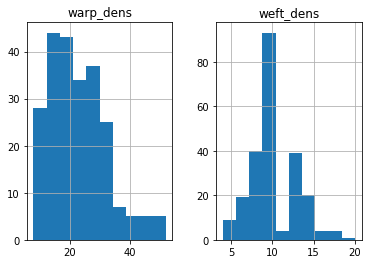

In [47]:
densities = pandas.DataFrame(data, columns = ['internal_storage', 'warp_dens', 'weft_dens'])
dens_warp = numpy.array(densities['warp_dens'])
dens_weft = numpy.array(densities['weft_dens'])
descript_warp = stats.describe(dens_warp)
descript_weft = stats.describe(dens_weft)
densities.hist()
print(descript_warp)
print(descript_weft)

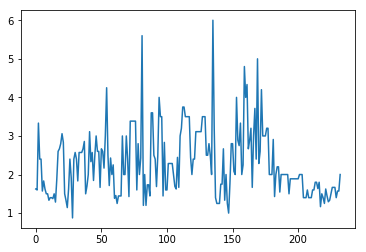

In [28]:
dataframe['dens_ratios'].plot()

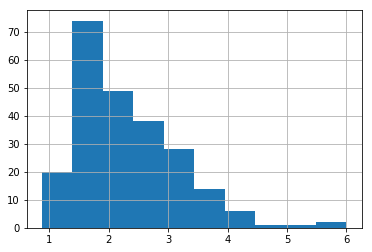

In [27]:
dataframe['dens_ratios'].hist()

##### Описательные статистики для плотностей по утку основе (для всей выборки)

In [ ]:
mean_dens_warp = statistics.mean(dens_warp)
mean_dens_weft = statistics.mean(dens_weft)
mode_dens_warp = statistics.mode(dens_warp)
mode_dens_weft = statistics.mode(dens_weft)
median_dens_warp = statistics.median(dens_warp)
median_dens_weft = statistics.median(dens_weft)
print("Среднее значение плотности по основе = " + str(mean_dens_warp))
print("Среднее значение плотности по основе = " + str(mean_dens_weft))
print("Модальное значение плотности по основе = " + str(mode_dens_warp))
print("Модальное значение плотности по основе = " + str(mode_dens_weft))
print("Медиана плотности по основе = " + str(median_dens_warp))
print("Медиана плотности по основе = " + str(median_dens_weft))

Среднее значение плотности по основе = 22
Среднее значение плотности по основе = 10
Модальное значение плотности по основе = 28
Модальное значение плотности по основе = 10
Медиана плотности по основе = 22
Медиана плотности по основе = 10




### Проверка нормальности распределения плотностей
Проверка критериев Шапиро-Уилка

In [48]:
print("Тест Шапиро-Уилка - плотность по основе - " + str(stats.shapiro(dens_warp)))
print("Тест Шапиро-Уилка - плотность по утку - " + str(stats.shapiro(dens_weft)))
stats.kstest(dens_warp, 'norm')
stats.kstest(dens_weft, 'norm')

Тест Шапиро-Уилка - плотность по основе - (0.939862847328186, 3.39950112504539e-08)
Тест Шапиро-Уилка - плотность по утку - (0.9553669095039368, 1.2685146657531732e-06)


KstestResult(statistic=0.9999683287581669, pvalue=0.0)

In [57]:
model = KMeans(n_clusters=3)
dens_ratios = pandas.Series(dataframe['dens_ratios'])
dens_ratios = numpy.array(dens_ratios)
#dens_ratios = numpy.array.reshape(-1, 1)
#print(dens_ratios)
#dens_ratios = np.array(dataframe['order']['dens_ratios'])
#dens = 
#model.fit(dens_ratios)